AI: ChatGPT 4o mini

Import the normal libraries in python for doing data analysis, including seaborn, matplotlib, plotly, and sklearn

In [45]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importing necessary modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

Load the dataset saved at "card_transdata.csv", and use the hape, info, and describe methods

In [2]:
import pandas as pd

# Load the dataset
file_path = "card_transdata.csv"
transaction_data_raw = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(transaction_data_raw.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  


In [3]:
transaction_data_raw.shape

(999, 8)

In [4]:
transaction_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [5]:
transaction_data_raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,999.000000,996.000000,997.000000,992.000000,995.000000,997.000000,995.000000,999.000000
mean,26.876607,5.437319,1.655069,0.892137,0.313568,0.117352,0.673367,0.079079
std,63.899697,35.668094,2.351386,0.310364,0.464176,0.322001,0.469218,0.269997
min,0.104184,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.990543,0.306441,0.468123,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.340321,0.958539,0.955504,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.393952,3.137259,1.922025,1.000000,1.000000,0.000000,1.000000,0.000000
max,965.910612,990.070315,36.074366,1.000000,1.000000,1.000000,1.000000,1.000000


Check for missing values

In [6]:
# Check for missing values
missing_values = transaction_data_raw.isnull().sum()
print(missing_values)

distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


Prompt: Create a copy of the data called transaction_data_cleaned that drops the the null values and show the first few rows

In [7]:
transaction_data_cleaned = transaction_data_raw.dropna()
print("Shape of the cleaned dataset:", transaction_data_cleaned.shape)

Shape of the cleaned dataset: (977, 8)


Prompt: also print the first couple of rows of the cleaned data

In [8]:
transaction_data_cleaned.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0


visualize the class distribution of the data with the fraud class

Text(0, 0.5, 'Count')

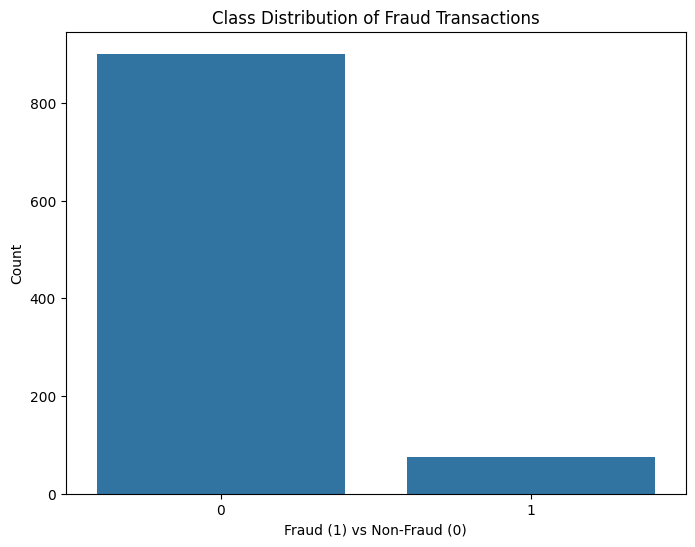

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=transaction_data_cleaned)

# Adding labels and title
plt.title('Class Distribution of Fraud Transactions')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Count')

Visualize the used_pin_number distribution

Text(0, 0.5, 'Count')

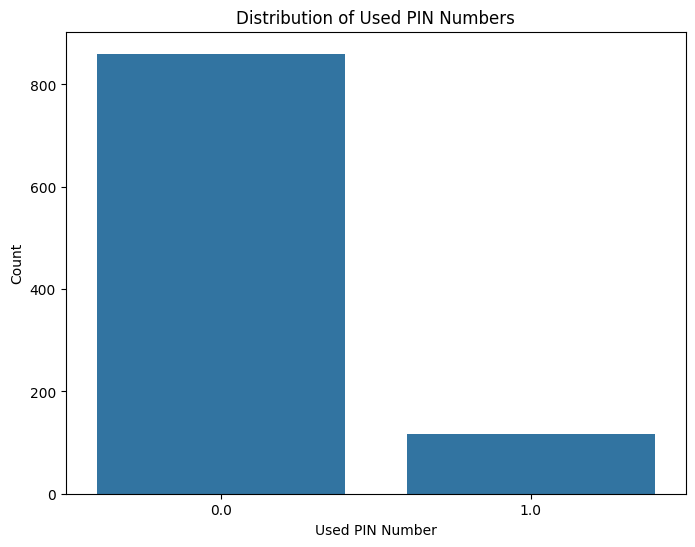

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='used_pin_number', data=transaction_data_cleaned)

# Adding labels and title
plt.title('Distribution of Used PIN Numbers')
plt.xlabel('Used PIN Number')
plt.ylabel('Count')

visualize the repeat_retailer distribution

Text(0, 0.5, 'Count')

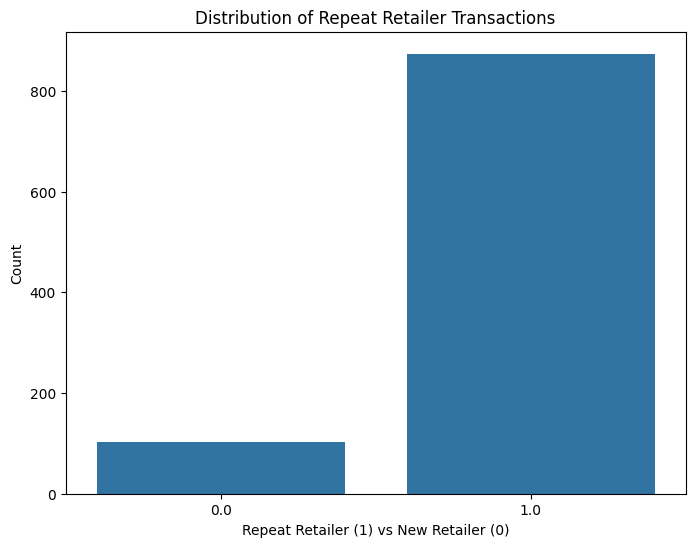

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='repeat_retailer', data=transaction_data_cleaned)

# Adding labels and title
plt.title('Distribution of Repeat Retailer Transactions')
plt.xlabel('Repeat Retailer (1) vs New Retailer (0)')
plt.ylabel('Count')

visualize the used chip distribution

Text(0, 0.5, 'Count')

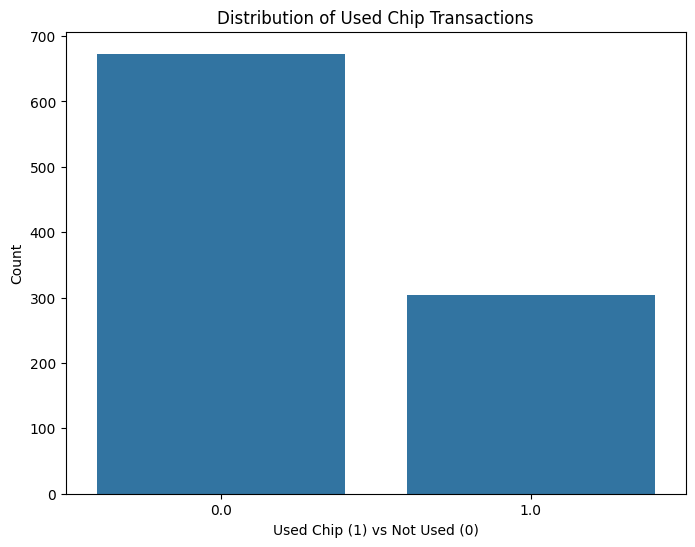

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='used_chip', data=transaction_data_cleaned)

# Adding labels and title
plt.title('Distribution of Used Chip Transactions')
plt.xlabel('Used Chip (1) vs Not Used (0)')
plt.ylabel('Count')

Visualize the online order distribution

Text(0, 0.5, 'Count')

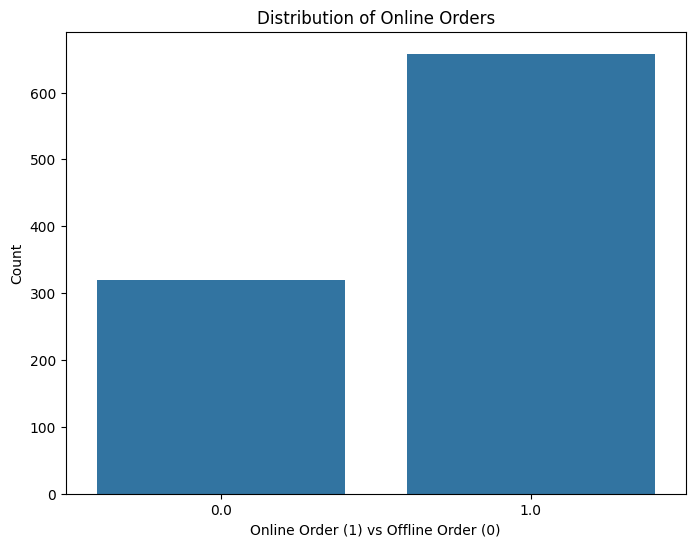

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=transaction_data_cleaned)

# Adding labels and title
plt.title('Distribution of Online Orders')
plt.xlabel('Online Order (1) vs Offline Order (0)')
plt.ylabel('Count')

Visualize the distribution of 'distance_from_last_transaction'

Text(0, 0.5, 'Frequency')

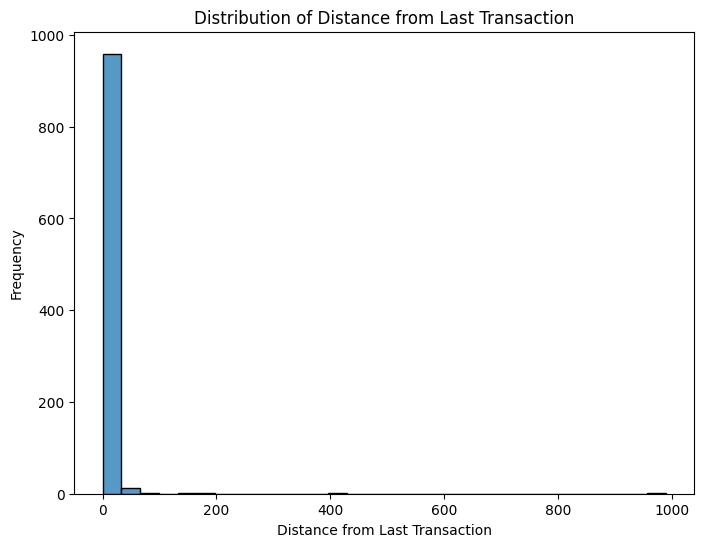

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data_cleaned['distance_from_last_transaction'], bins=30)

# Adding labels and title
plt.title('Distribution of Distance from Last Transaction')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Frequency')

Visualize the distribution of 'ratio_to_median_purchase_price'


Text(0, 0.5, 'Frequency')

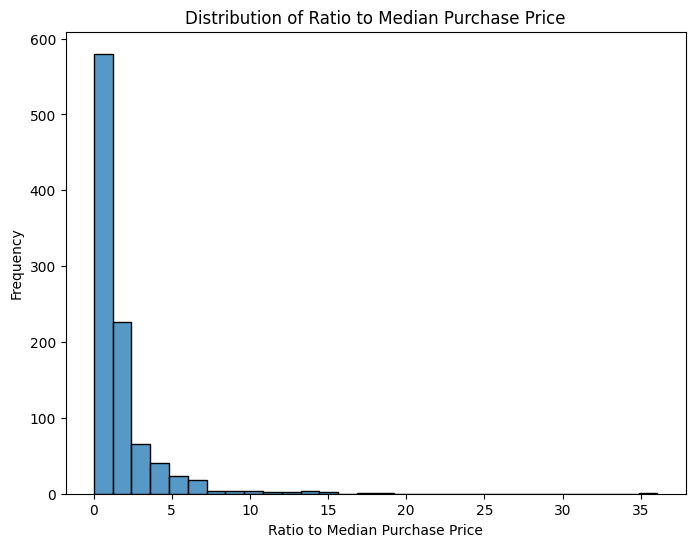

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data_cleaned['ratio_to_median_purchase_price'], bins=30)

# Adding labels and title
plt.title('Distribution of Ratio to Median Purchase Price')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Frequency')

create a countplot with the x axis being 'used_pin_number', hue as 'fraud', platte as green and red

set the title to Transactions with PIN vs Fraudulent Transactions, xlabel to Used PIN, y label to count, and create a good legend

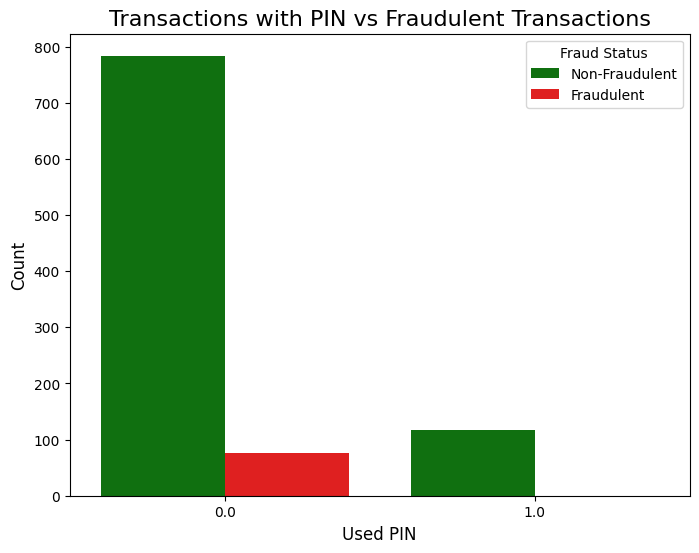

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='used_pin_number', hue='fraud', data=transaction_data_cleaned, palette=['green', 'red'])

# Adding the title and labels
ax.set_title('Transactions with PIN vs Fraudulent Transactions', fontsize=16)
ax.set_xlabel('Used PIN', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Customize the legend
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

Create a percentage plot to show the percentage of fraudulent transactions when a PIN was used or not using a stacked bar chart

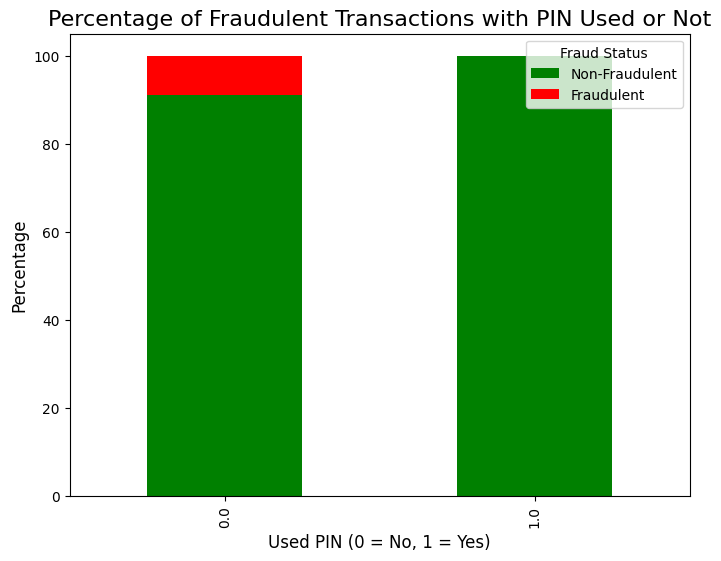

In [19]:
fraud_grouped = transaction_data_cleaned.groupby(['used_pin_number', 'fraud']).size().unstack()
fraud_percentage = fraud_grouped.div(fraud_grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = fraud_percentage.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Adding the title and labels
ax.set_title('Percentage of Fraudulent Transactions with PIN Used or Not', fontsize=16)
ax.set_xlabel('Used PIN (0 = No, 1 = Yes)', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Customize the legend
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

Create a count plot to show the number of transactions that were fraudulent vs non-fraudulent when a transaction was from the same retailer or not

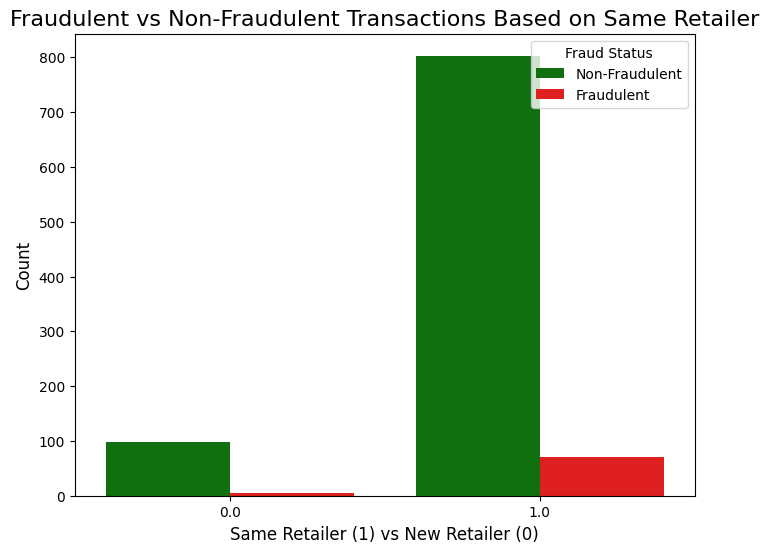

In [20]:
# Visualize the countplot for fraudulent vs non-fraudulent transactions
# when the transaction is from the same retailer or not
plt.figure(figsize=(8, 6))
sns.countplot(x='repeat_retailer', hue='fraud', data=transaction_data_cleaned, palette=['green', 'red'])

# Adding labels and title
plt.title('Fraudulent vs Non-Fraudulent Transactions Based on Same Retailer', fontsize=16)
plt.xlabel('Same Retailer (1) vs New Retailer (0)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the legend
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

# Show the plot
plt.show()

Create a percentage plot to show the percentage of fraudulent transactions when a transaction was from the same retailer or not

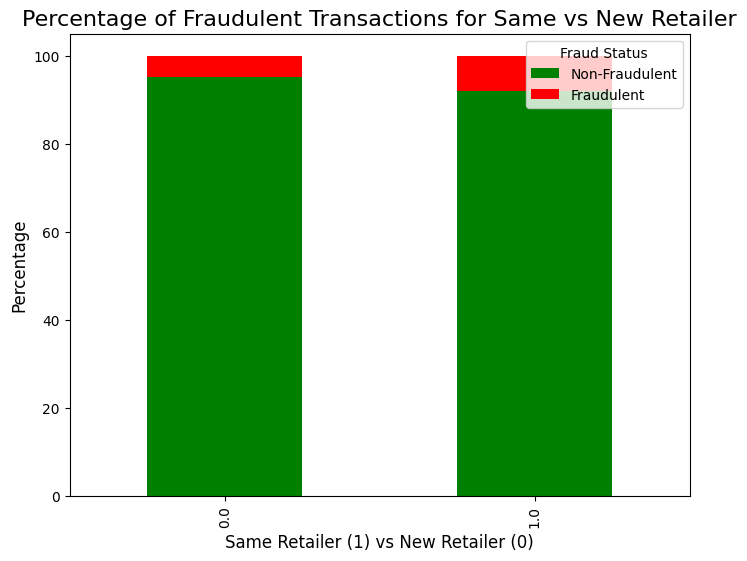

In [22]:
fraud_grouped = transaction_data_cleaned.groupby(['repeat_retailer', 'fraud']).size().unstack()

# Calculate the percentage of fraudulent transactions
fraud_percentage = fraud_grouped.div(fraud_grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = fraud_percentage.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Adding the title and labels
ax.set_title('Percentage of Fraudulent Transactions for Same vs New Retailer', fontsize=16)
ax.set_xlabel('Same Retailer (1) vs New Retailer (0)', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Customize the legend
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

# Show the plot
plt.show()

Create a count plot to show the number of transactions that were fraudulent vs non-fraudulent when a chip was used or not

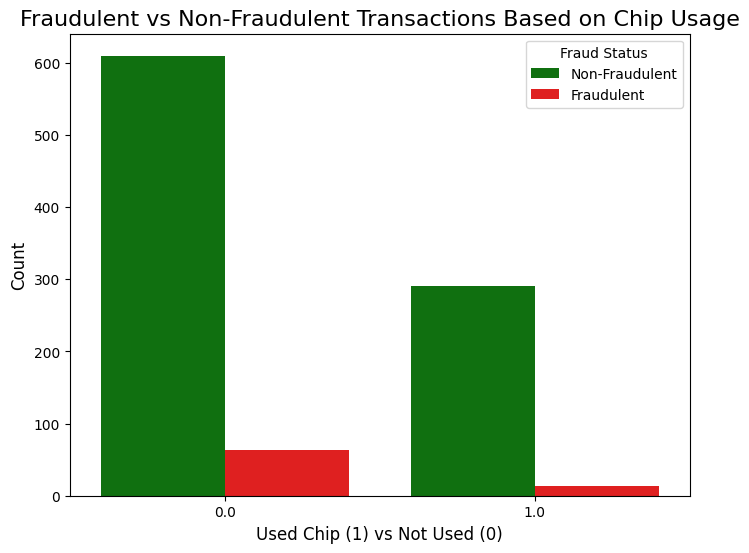

In [23]:
# Visualize the countplot for fraudulent vs non-fraudulent transactions
# when the chip was used or not
plt.figure(figsize=(8, 6))
sns.countplot(x='used_chip', hue='fraud', data=transaction_data_cleaned, palette=['green', 'red'])

# Adding labels and title
plt.title('Fraudulent vs Non-Fraudulent Transactions Based on Chip Usage', fontsize=16)
plt.xlabel('Used Chip (1) vs Not Used (0)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the legend
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

# Show the plot
plt.show()

Create a percentage plot to show the percentage of fraudulent transactions when a chip was used or not


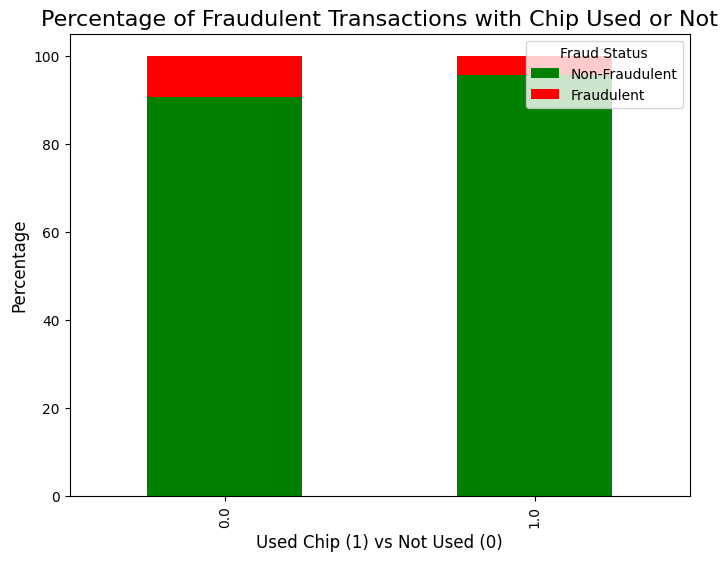

In [24]:
# Group by 'used_chip' and 'fraud' and calculate the count
fraud_grouped = transaction_data_cleaned.groupby(['used_chip', 'fraud']).size().unstack()

# Calculate the percentage of fraudulent transactions
fraud_percentage = fraud_grouped.div(fraud_grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = fraud_percentage.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Adding the title and labels
ax.set_title('Percentage of Fraudulent Transactions with Chip Used or Not', fontsize=16)
ax.set_xlabel('Used Chip (1) vs Not Used (0)', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Customize the legend
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

# Show the plot
plt.show()

Show the number of transactions that were fraudulent vs non-fraudulent when it was an online order or not

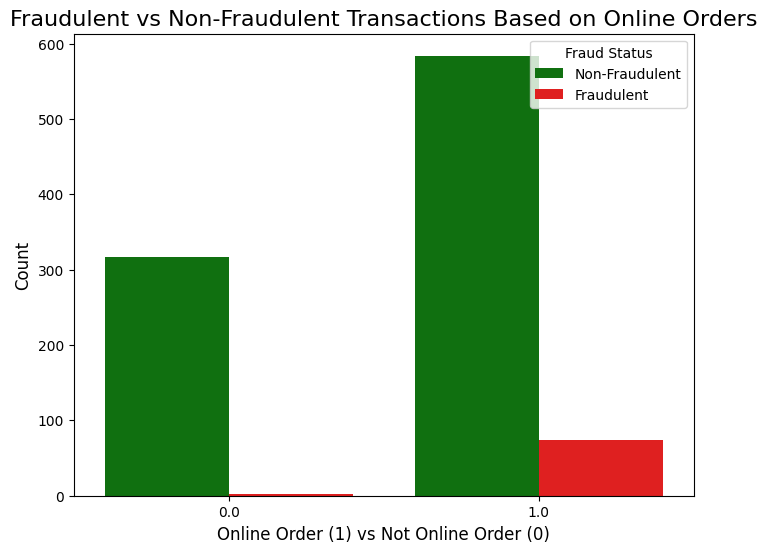

In [25]:
# Visualize the countplot for fraudulent vs non-fraudulent transactions
# when the transaction was an online order or not
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', hue='fraud', data=transaction_data_cleaned, palette=['green', 'red'])

# Adding labels and title
plt.title('Fraudulent vs Non-Fraudulent Transactions Based on Online Orders', fontsize=16)
plt.xlabel('Online Order (1) vs Not Online Order (0)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the legend
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

# Show the plot
plt.show()

Create a percentage plot to show the percentage of fraudulent transactions when it was an online order or not


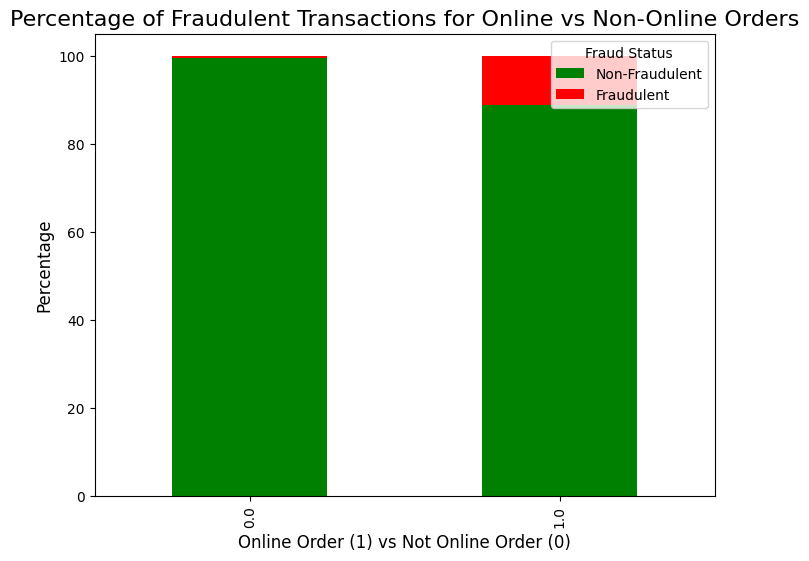

In [26]:
# Group by 'online_order' and 'fraud' and calculate the count
fraud_grouped = transaction_data_cleaned.groupby(['online_order', 'fraud']).size().unstack()

# Calculate the percentage of fraudulent transactions
fraud_percentage = fraud_grouped.div(fraud_grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = fraud_percentage.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Adding the title and labels
ax.set_title('Percentage of Fraudulent Transactions for Online vs Non-Online Orders', fontsize=16)
ax.set_xlabel('Online Order (1) vs Not Online Order (0)', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Customize the legend
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')

# Show the plot
plt.show()

Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions between distance from home and ratio to median purchase price

Text(0, 0.5, 'Ratio to Median Purchase Price')

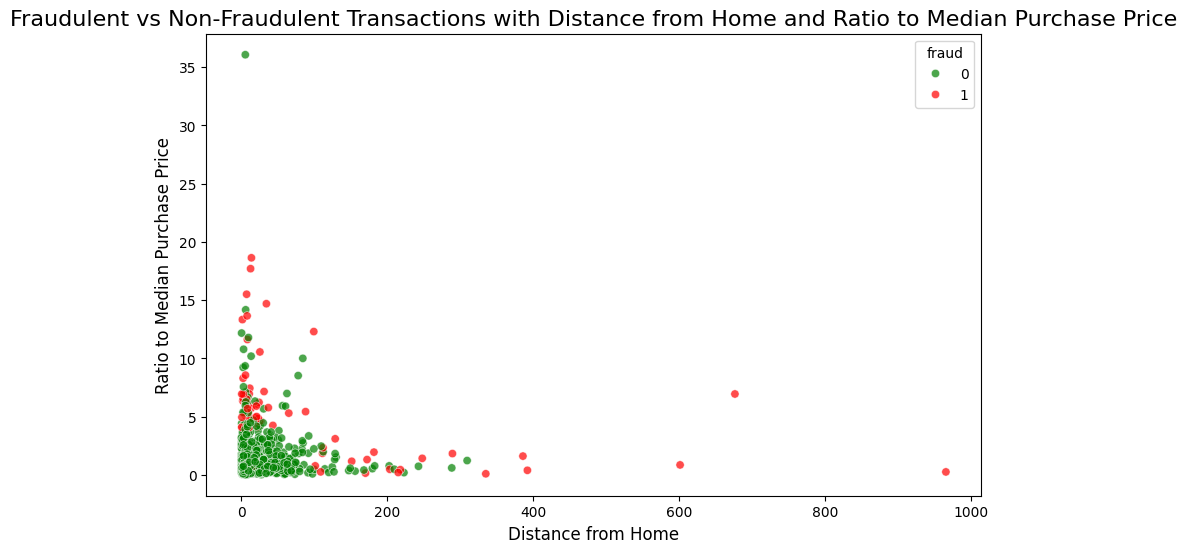

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_home', y='ratio_to_median_purchase_price', hue='fraud', data=transaction_data_cleaned, palette=['green', 'red'], alpha=0.7)

# Adding labels and title
plt.title('Fraudulent vs Non-Fraudulent Transactions with Distance from Home and Ratio to Median Purchase Price', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Ratio to Median Purchase Price', fontsize=12)

Do the same, but between distance from home and distance from last transaction

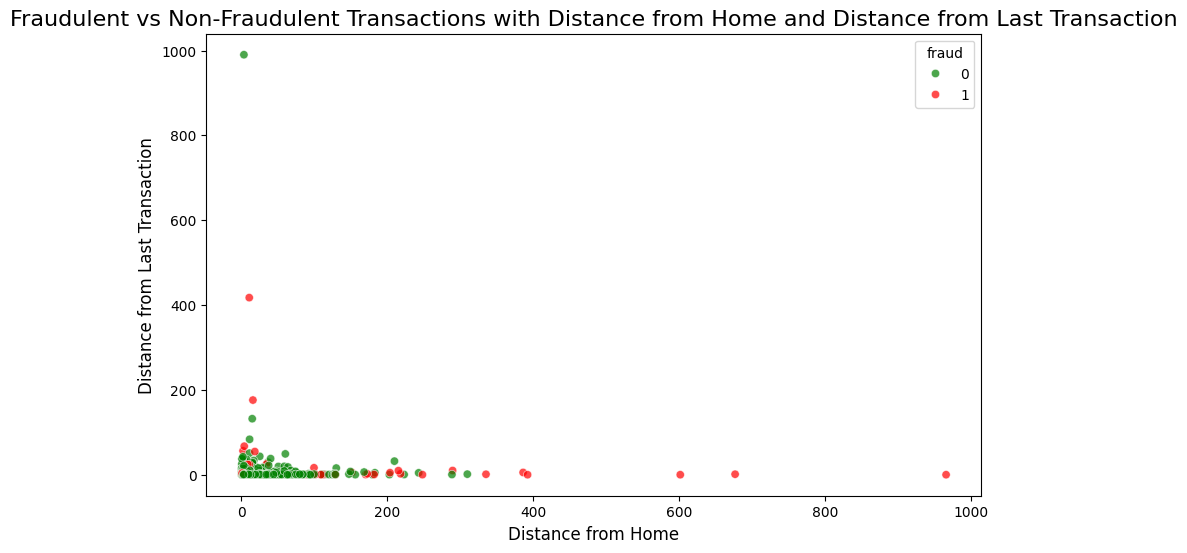

In [30]:
# Visualize the scatter plot showing fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', hue='fraud', data=transaction_data_cleaned, palette=['green', 'red'], alpha=0.7)

# Adding labels and title
plt.title('Fraudulent vs Non-Fraudulent Transactions with Distance from Home and Distance from Last Transaction', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Distance from Last Transaction', fontsize=12)

# Show the plot
plt.show()

Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions for distance_from_last_transaction vs ratio_to_median_purchase_price

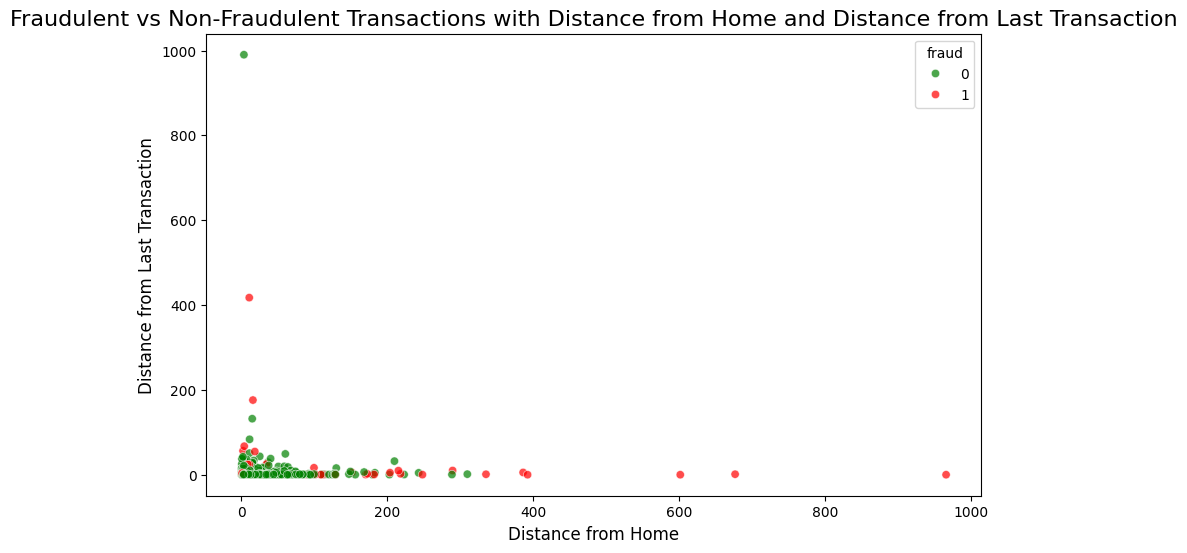

In [32]:
# Visualize the scatter plot showing fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', hue='fraud', data=transaction_data_cleaned, palette=['green', 'red'], alpha=0.7)

# Adding labels and title
plt.title('Fraudulent vs Non-Fraudulent Transactions with Distance from Home and Distance from Last Transaction', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Distance from Last Transaction', fontsize=12)

# Show the plot
plt.show()

Make the target variable "fraud" and select the features, then split the data into training and testing sets

In [33]:
X = transaction_data_cleaned.drop(columns=['fraud'])  # Features (all columns except 'fraud')
y = transaction_data_cleaned['fraud']  # Target variable (fraud)

# Split the data into training and testing sets (80% training, 20% testing) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print out the testing data set below. How many transactions are in the testing set?

In [34]:
# Print the testing set
print("Testing dataset:")
print(X_test.head())  # Print the first few rows of the testing set

# Print the number of transactions in the testing set
print("\nNumber of transactions in the testing set:", X_test.shape[0])

Testing dataset:
     distance_from_home  distance_from_last_transaction  \
782            0.701100                        0.540487   
51            43.281314                        3.367793   
197            4.586564                        3.365070   
550            4.403263                        0.173726   
412          965.910612                        0.023604   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
782                        1.754568              0.0        0.0   
51                         0.676058              1.0        1.0   
197                        2.454288              1.0        0.0   
550                        0.641169              1.0        0.0   
412                        0.257908              1.0        0.0   

     used_pin_number  online_order  
782              0.0           1.0  
51               1.0           1.0  
197              0.0           0.0  
550              0.0           0.0  
412              0.0           1.0  

Nu

make a variable y_pred_never_fraud contains a 0 for every case in y_test

In [35]:
y_pred_never_fraud = [0] * len(y_test)  # Assign 0 to all elements in y_test

# Print the first few predictions
print("First few predictions (never fraud):")
print(y_pred_never_fraud[:10])

First few predictions (never fraud):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


make train, and predict with a KNN classifier that uses 3 neighbors, print the first 100 predictions

In [36]:
# Initialize the KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Print the first 100 predictions
print("First 100 predictions with KNN (3 neighbors):")
print(y_pred_knn[:100])

First 100 predictions with KNN (3 neighbors):
[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


Confusion matrix for Never Fraud Model

Confusion Matrix for 'Never Fraud' model:
[[181   0]
 [ 15   0]]

Classification Report for 'Never Fraud' model:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       181
           1       0.00      0.00      0.00        15

    accuracy                           0.92       196
   macro avg       0.46      0.50      0.48       196
weighted avg       0.85      0.92      0.89       196



c:\Users\dpefl\Documents\Fall2024\mat311\ai assignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dpefl\Documents\Fall2024\mat311\ai assignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dpefl\Documents\Fall2024\mat311\ai assignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

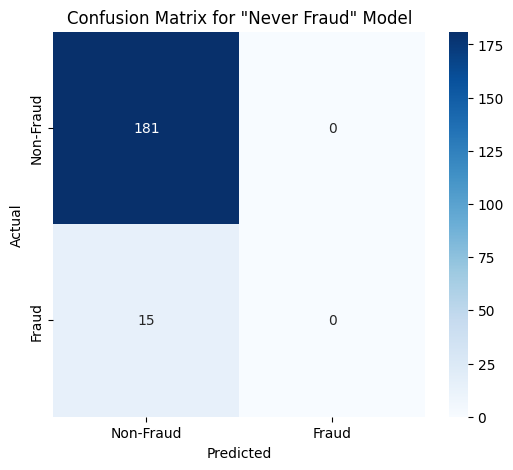

In [37]:
# Confusion Matrix for the "Never Fraud" model
conf_matrix_never_fraud = confusion_matrix(y_test, y_pred_never_fraud)

# Print the confusion matrix
print("Confusion Matrix for 'Never Fraud' model:")
print(conf_matrix_never_fraud)

# Print the classification report
print("\nClassification Report for 'Never Fraud' model:")
print(classification_report(y_test, y_pred_never_fraud))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_never_fraud, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for "Never Fraud" Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

do the same as before, but with the KNN model we created earlier

Confusion Matrix for KNN model:
[[176   5]
 [  7   8]]

Classification Report for KNN model:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       181
           1       0.62      0.53      0.57        15

    accuracy                           0.94       196
   macro avg       0.79      0.75      0.77       196
weighted avg       0.94      0.94      0.94       196



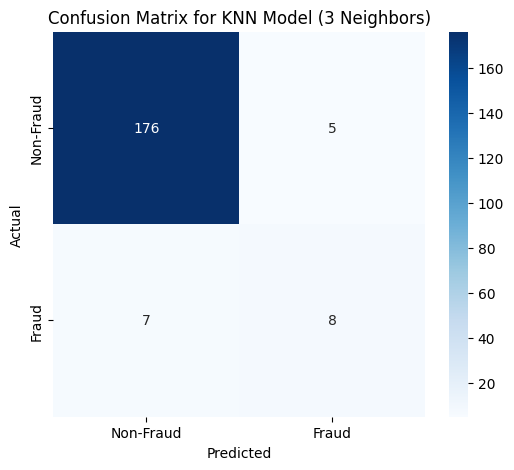

In [38]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("Confusion Matrix for KNN model:")
print(conf_matrix_knn)

# Print the classification report
print("\nClassification Report for KNN model:")
print(classification_report(y_test, y_pred_knn))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for KNN Model (3 Neighbors)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plot the accuracy, precision, recall, and f1 against each other

c:\Users\dpefl\Documents\Fall2024\mat311\ai assignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


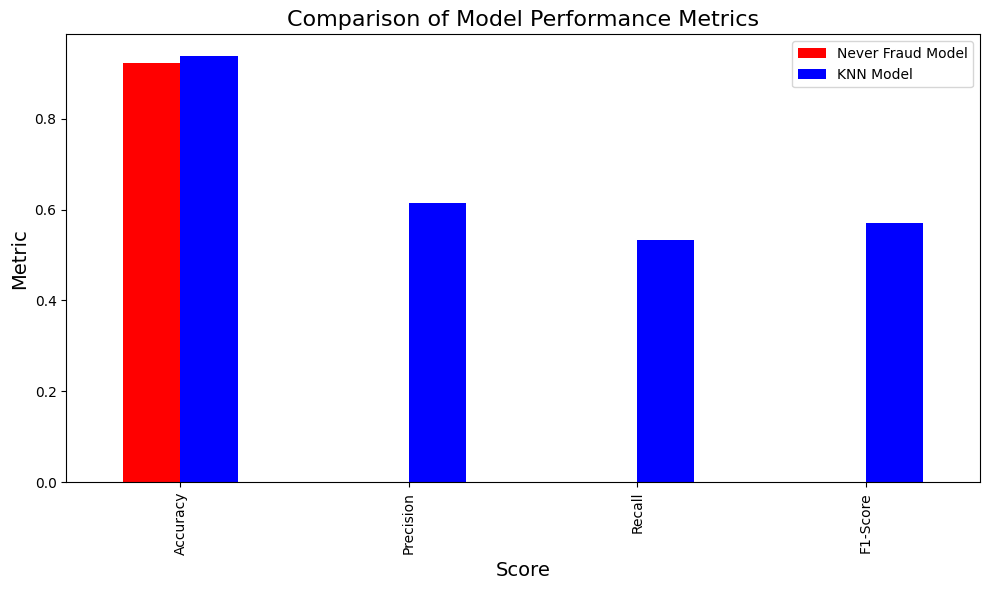

In [43]:
# Compute metrics for 'Never Fraud' model
accuracy_never_fraud = accuracy_score(y_test, y_pred_never_fraud)
precision_never_fraud = precision_score(y_test, y_pred_never_fraud)
recall_never_fraud = recall_score(y_test, y_pred_never_fraud)
f1_never_fraud = f1_score(y_test, y_pred_never_fraud)

# Compute metrics for KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Create a dictionary to store the metrics for plotting
metrics = {
    'Never Fraud Model': [accuracy_never_fraud, precision_never_fraud, recall_never_fraud, f1_never_fraud],
    'KNN Model': [accuracy_knn, precision_knn, recall_knn, f1_knn]
}

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Plotting the comparison with custom colors, without the legend
metrics_df.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'] )

# Set plot title and labels
plt.title('Comparison of Model Performance Metrics', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Metric', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

create a 3d plot of the KNN Predictions

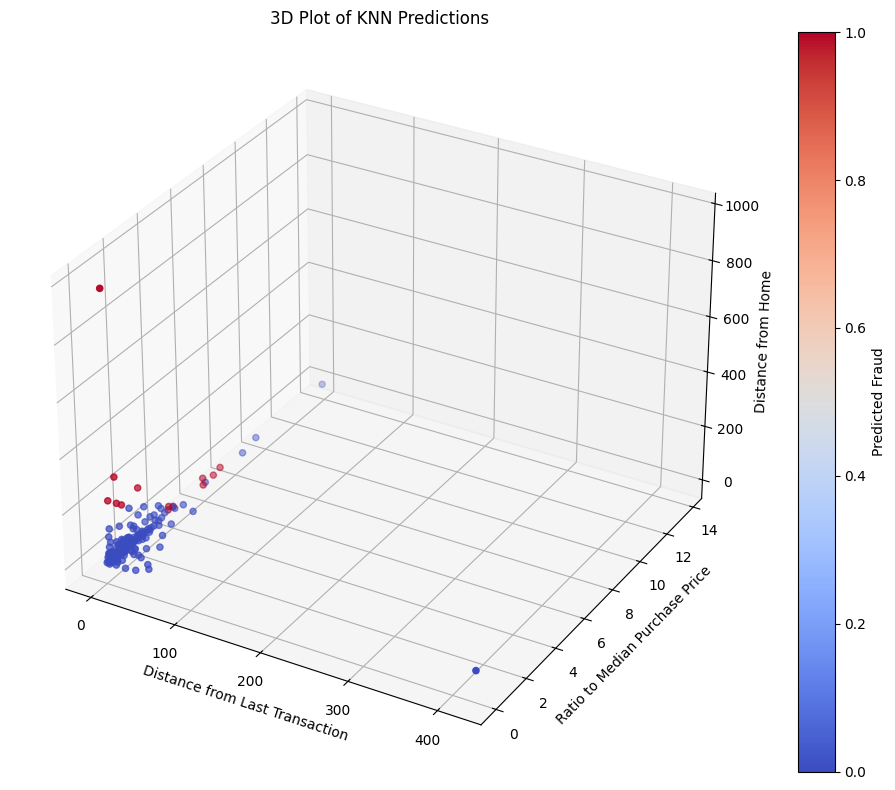

In [44]:
# Select three features for the 3D plot
X_test_3d = X_test[['distance_from_last_transaction', 'ratio_to_median_purchase_price', 'distance_from_home']]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
scatter = ax.scatter(X_test_3d.iloc[:, 0], X_test_3d.iloc[:, 1], X_test_3d.iloc[:, 2], c=y_pred_knn, cmap='coolwarm', marker='o')

# Set plot labels
ax.set_xlabel('Distance from Last Transaction')
ax.set_ylabel('Ratio to Median Purchase Price')
ax.set_zlabel('Distance from Home')

# Set plot title
ax.set_title('3D Plot of KNN Predictions')

# Show the color bar
plt.colorbar(scatter, label='Predicted Fraud')

# Show the plot
plt.tight_layout()
plt.show()